In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

import pandas as pd

# Reformat file

In [15]:
file_raw = 'ENSO_3.4_1982-2021_raw.csv'
file_new = 'ENSO_3.4_1982-2021.csv'
with open(file_raw, 'r') as file:
    with open(file_new, 'w') as n:
        for l in file.readlines():
            l = l.rstrip('\n')
            a = l.split(' ')
            a = list(filter(lambda x: x != '', a))
            l = ','.join(a)
            n.write(l+'\n')
#             print(l)

In [18]:
df = pd.read_csv(file_new)
df.insert(2, 'YR+MON', df['YR']+df['MON']/12)
df.to_csv(file_new, index=False)

# Analyze data

In [19]:
df = pd.read_csv('ENSO_3.4_1982-2021.csv')

<IPython.core.display.Javascript object>


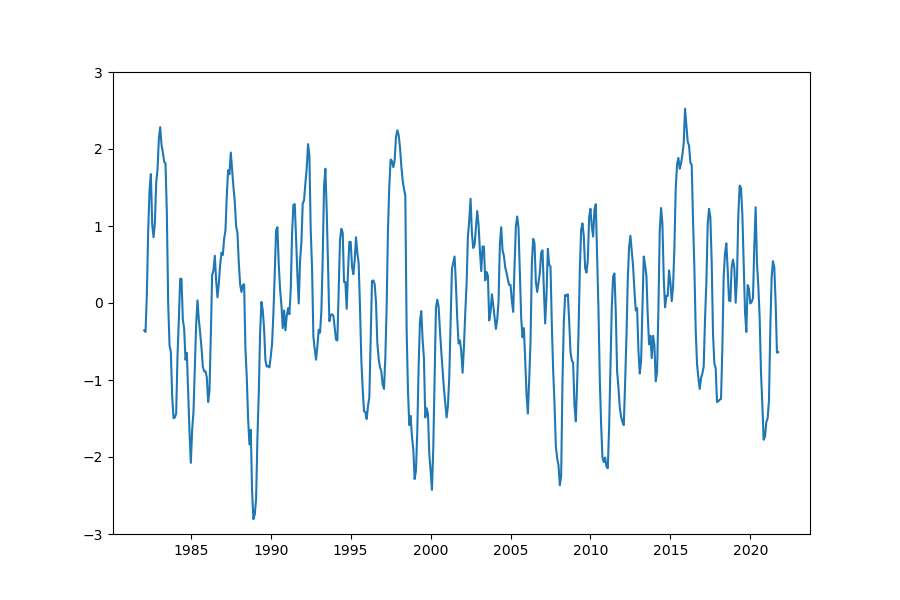

(-3.0, 3.0)

In [22]:
fig,ax = plt.subplots(figsize=(9,6))
plt.plot(df['YR+MON'], df['NINO3.4'] - np.mean(df['NINO3.4']))
plt.ylim(-3,3)

In [26]:
matplotlib.rc('font', size=14)

<IPython.core.display.Javascript object>


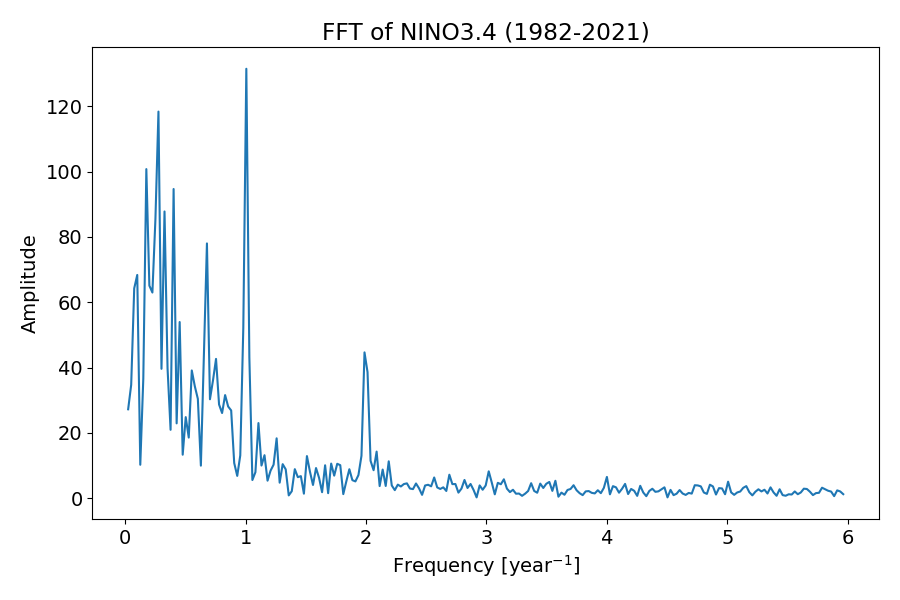

In [35]:
fig,ax = plt.subplots(figsize=(9,6))

fft = np.abs(np.fft.fft(df['NINO3.4'] - np.mean(df['NINO3.4'])))
freq = np.fft.fftfreq(len(df), d = 1/12)

fft = fft[1:len(fft)//2]
freq = freq[1:len(freq)//2]


plt.plot(freq, fft)

# plt.xlim(0,7)

plt.xlabel('Frequency [year$^{-1}$]')
plt.ylabel('Amplitude')
plt.title('FFT of NINO3.4 (1982-2021)')

fig.tight_layout()

In [36]:
fig.savefig('NINO3.4_fft.pdf')